# Titanic classification 

# Data loading

In [185]:
import pandas as pd
import os

DATASET_FOLDER = 'datasets/titanic'

test_set = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
train_set = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))

In [200]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data exploration

The description of the different values.
<br><br>

|Variable|Definition|Key|
|--------|----------|---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex| |	
|Age	|Age |in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	| |
|parch	|# of parents / children aboard the Titanic|	|
|ticket	|Ticket number| |	
|fare	|Passenger fare|	|
|cabin|	Cabin number| |	
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

<br> taken from [Kaggle](https://www.kaggle.com/c/titanic/data) <br><br>

In [186]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<br><br>
First we can see that there are missing entries for 'Age' and 'Fare'. <br>
Only one guy didn't pay the fare interestingly, maybe the captain? <br><br>

In [188]:
maybe_captain = train_set.query("Fare.isna()")
maybe_captain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<br>
Seems like a normal guy not the captain. <br><br>

Let's see how has no name entry maybe mostly women? <br><br>

In [189]:
age_not_available = train_set.query("Age.isna()")
age_not_available

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<AxesSubplot:>

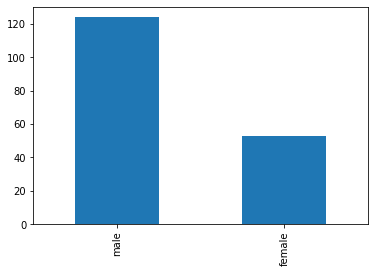

In [190]:
age_not_available["Sex"].value_counts().plot(kind='bar')

<br><br>
Was also a wrong assumption most of them where male.
<br>

In [191]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<br><br>
Seems like most of the entries for cabin are missing (maybe we should remove it).
<br><br>
Let's look at the correlation of the different attributes. <br><br>

In [192]:
correlation_matrix = train_set.corr()
correlation_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<br>
Seems like the class of the ticket has a negative correlation on the survival and
also the fare as a high positive correlation on survival. That means that richer people
had a higher chance to surive. <br>
Let's see if we can see it in the data.
<br><br>

<AxesSubplot:>

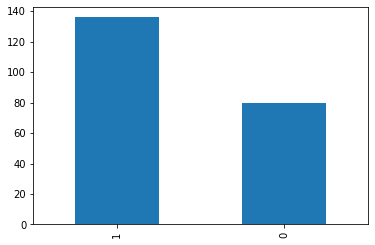

In [193]:
class_one = train_set.query("Pclass == 1")
class_one["Survived"].value_counts().plot(kind='bar')

<AxesSubplot:>

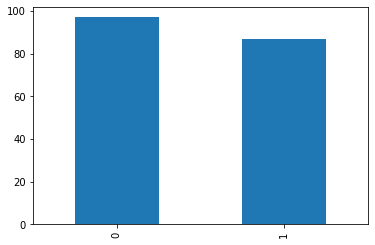

In [194]:
class_two = train_set.query("Pclass == 2")
class_two["Survived"].value_counts().plot(kind='bar')

<AxesSubplot:>

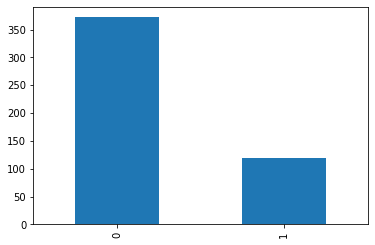

In [195]:
class_three = train_set.query("Pclass == 3")
class_three["Survived"].value_counts().plot(kind='bar')

<br> Seems like in class one the passangers had a chance of roughly 50% to survive. For the other two classes the
passangers really had a smaller chance to survive. <br><br>

# Data cleaning

First we should split the data into labels and training attributes.


In [196]:
y_train = train_set["Survived"].copy()
X_train = train_set.drop(['Survived'], axis=1)

We probably should remove the name and the cabin attributes because the name is more or less
uninteresting and the cabin is very uncomplete <br><br>

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnRemover(BaseEstimator, TransformerMixin):
    def __init__(self, ids=[]):
        self.ids = ids
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.ids, axis=1)

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = ['Fare','Age', 'Parch', 'SibSp']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

train_transformed = preprocessing_pipeline.fit_transform(X_train)
print(train_transformed.shape)
X_train_transformed = pd.DataFrame(train_transformed, columns=list([*numeric_features, 'C', 'Q', 'S', 'female', 'male', '1', '2', '3']))
X_train_transformed.head()

(418, 12)


,Fare,Age,Parch,SibSp,C,Q,S,female,male,1,2,3
0,-0.497413,0.386231,-0.400248,-0.499470,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.512278,1.371370,-0.400248,0.616992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.464100,2.553537,-0.400248,-0.499470,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.482475,-0.204852,-0.400248,-0.499470,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.417492,-0.598908,0.619896,0.616992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# SGD Classifier

In [207]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessing_pipeline),
        ('sgd_class', SGDClassifier(random_state=42))
    ]
)

scores = cross_val_score(sgd_pipeline, X_train, y_train, cv=5)
scores.mean()

0.7597828133827129

# Random Forest classification

In [206]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessing_pipeline),
        ('forest_class', RandomForestClassifier(random_state=42))
    ]
)

scores = cross_val_score(forest_pipeline, X_train, y_train, cv=5)
scores.mean()

0.811461929571276